In [1]:
import drawsvg as dw
%load_ext jhmagics

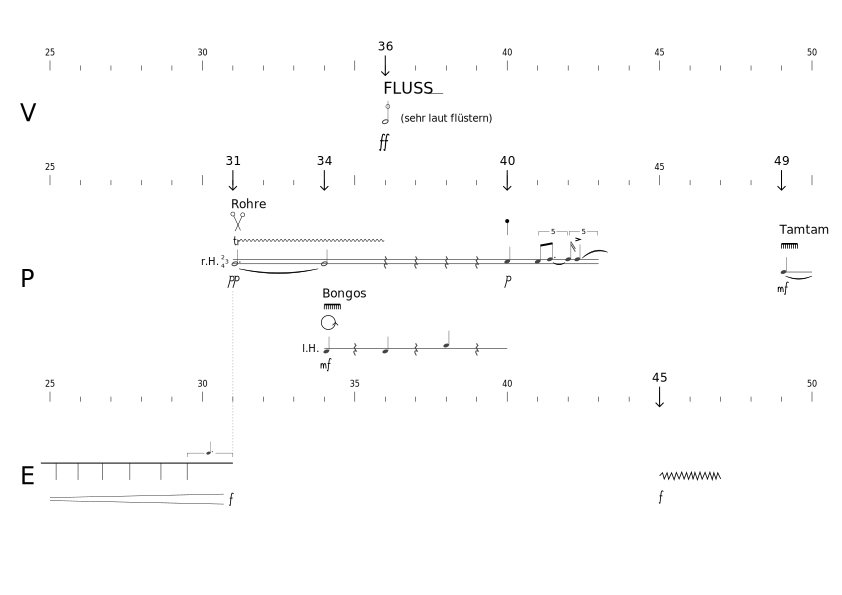

In [2]:
%%jh

w,h = 842,595
d = dw.Drawing(w,h,font_family='Simvoni')

# fonts: Simvoni für zahlen und text sprechstimme
#        Cantarell für musikalische anweisungen

# page settings
xnum,ynum = 26,22 # posts (= one more than divisions)
mleft,mright,mtop,mbot = 50,30,30,30
xsize,ysize = w-mleft-mright,h-mtop-mbot
xunit,yunit = xsize / (xnum-1),ysize / (ynum-1)

# load own functions
from os import listdir
dir = '/home/jh/src/svg/lib'
files = listdir(dir)
for file in files:
    if file[-3:] == '.py':
        f = '%s/%s' % (dir,file)
        exec(open(f).read())

# custom functions for xgrid and ygrid for this page
def xg(indx):
    return xgrid(indx,tm0)
def yg(indx):
    return ygrid(indx)
    
# raster am rand zur orientierung
#showGridOnMargins()
#showWritingSpace()

# zeitleisten und instrumente links
tm0 = 25  # zeit am anfang dieser seite
off = 15 # offset für die striche
 # normale zahlen in V P E
norm = [[25,30,40,45,50],[25,45],[25,30,35,40,50]]
 # events in V P E
event = [[36],[31,34,40,49],[45]]
 # ygrid positionen für die leisten
yleisten = [1,5.5,14]
 # instrumente 
insnamen = ['V','P','E']
ytimeplus = [*yleisten,ynum-1]
yposinsnamen = [ytimeplus[i]+(ytimeplus[i+1]-ytimeplus[i])/2 for i in range(3)]
 # write out
for l in range(3):
    y = ygrid(yleisten[l])
    text(insnamen[l],xgrid(0)-30,ygrid(yposinsnamen[l]),24,dominant_baseline='middle')
    for i in range(xnum):
        x = xgrid(i)
        if i%5==0: vline(x,y+off,-10,sw=.3)
        else: vline(x,y+off,-5,sw=.3)
        if (i+tm0) in norm[l]:
            text('%d'%(i+tm0),x,y,7,text_anchor='middle')
        elif (i+tm0) in event[l]:
            text('%d'%(i+tm0),x,y-5,12,text_anchor='middle')
            arrow(x,y,20,4)

# noten und pausen und dynamik größe
notsiz = 4.5
nothals = 1.2
pausiz = 4.5
dynsiz = 10

            
################# VOICE #################

x = xg(36)
ygindx = 2.2
ytextbaseline = yg(ygindx+.3)
text('FLUSS',x-2,ytextbaseline,16)
hline(xg(37.4),ytextbaseline,xunit*.5,sw=.5)
not2tel(x,yg(ygindx+1.4),nothals*1.5,notsiz)
circ(x+2.6,yg(ygindx+.8),r=2,swfac=2,fill='none')
text('(sehr laut flüstern)',xg(36.5),ygrid(ygindx+1.4),10,font_family='Cantarell Light',font_style='italic')
fortissimo(x-3,yg(ygindx+2.4),13)


################# PERCUSSION #################

 # linien und instrumente
ypercindx = yleisten[1]
ylinienmp = ypercindx+3.5 #oben
ylinienbg = ypercindx+7
ylinientm = ypercindx+4
yoffsetmp = notsiz #abstand der beiden metallplatten linien
startends = [31,43,34,40,49,50]
insnamen = ['Rohre','Bongos','Tamtam']
yoffsetins = [2,2,1.5] #abstand der namen von den linien
for i,yl in enumerate([ylinienmp,ylinienbg,ylinientm]):
    y = yg(yl)
    x1 = xg(startends[i*2])
    x2 = xg(startends[i*2+1])
    line(x1,y,x2,y,stroke_width=0.5)
    text(insnamen[i],x1-2,yg(yl-yoffsetins[i]),12,font_family='Cantarell')
    if i==0: 
        line(x1,y+yoffsetmp,x2,y+yoffsetmp,stroke_width=.5)
        text('2',x1-8,y-2,6,font_family='Cantarell',text_anchor='end',dominant_baseline='middle')
        text('4',x1-8,y+2+yoffsetmp,6,font_family='Cantarell',text_anchor='end',dominant_baseline='middle')
        text('3',x1-4,y+yoffsetmp/2,6,font_family='Cantarell',text_anchor='end',dominant_baseline='middle')
        text('r.H.',x1-14,y+yoffsetmp/2,10,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')

 # metallrohre
  # erste gruppe
x = xg(31)
yl = yg(ylinienmp) #obere linie
yname = yg(ylinienmp-yoffsetins[0])
perc2SoftMallets(x+5,yname+5,prop=9)
not2tel(x+2,yl+notsiz,nothals,notsiz,dotted=1)
tie(xg(31.2),yl+notsiz+5,xg(33.8),yl+notsiz+5,.5,.5)
not2tel(xg(34),yl+notsiz,nothals,notsiz)
triller(x+2,yl-14,xg(36),9)
pianissimo(x,yl+22,dynsiz)
  #pausen
for i in (36,37,38,39):
    paus4tel(xg(i),yl+notsiz/2,pausiz,swfac=1.5)
  #zweite gruppe
percHardMallet(xg(40),yl-yunit*1.5)
not4tel(xg(40),yl+notsiz/2,nothals,notsiz)
xb1,yb1 = not4tel(xg(41),yl+notsiz/2,nothals+.1,notsiz)
xb2,yb2 = not4tel(xg(41.4),yl,nothals+.1,notsiz,dotted=1)
line(xb1,yb1,xb2,yb2,stroke_width=2)
tie(xg(41.5),yl+notsiz/2+1,xg(41.9),yl+notsiz/2+1,1.5,.5)
not16tel(xg(42),yl,nothals,notsiz)
xx,yy = not4tel(xg(42.3),yl,nothals,notsiz)
accent(xg(42.3),yy-5,6)
tie(xg(42.45),yl-1,xg(43.3),yl-7,-2,.4) #laisser vibrer
yy -= 13
nlets(xg(41),yy,xg(42),yy,2,text='5')
piano(xg(40),yl+22,dynsiz)

 # bongos
x = xg(34)
yl = yg(ylinienbg) #linie
text('l.H.',x-5,yl,10,text_anchor='end',dominant_baseline='middle',font_family='Cantarell')
yname = yg(ylinienbg-yoffsetins[1])
buerste(x,yname+7,8)
kreisLinks(x+4,yname+25)
mezzoforte(x,yl+20,dynsiz)
not4tel(x+2,yl+notsiz*.66,nothals,notsiz)
paus4tel(xg(35),yl,pausiz,swfac=1.5)
not4tel(xg(36),yl+notsiz*.66,nothals,notsiz)
paus4tel(xg(37),yl,pausiz,swfac=1.5)
not4tel(xg(38),yl-notsiz*.66,nothals,notsiz)
paus4tel(xg(39),yl,pausiz,swfac=1.5)

 # tamtam
x = xg(49)
yl = yg(ylinientm) #linie
yname = yg(ylinientm-yoffsetins[2])
buerste(x,yname+10,8)
not4tel(x+2,yl,nothals,notsiz)
tie(x+4,yl+4,xg(50),yl+4,1,.5)
mezzoforte(x,yl+20,dynsiz)


################# ELEKTRONIK #################

# EVENT 21 (von seite 1)
y = yg(17) #oben
hline(xg(24.7),y,xunit*6.3)
l = yunit*.66
klacks = [21.0, 21.21, 21.43, 21.68, 21.96, 22.28, 22.64, 23.04, 23.49, 
          24.0, 24.56, 25.2, 25.92, 26.72, 27.62, 28.64, 29.5]
for i in klacks:
    if i > 25: vline(xg(i),y,l,sw=.5)
yy = y+40
forte(xg(30.9),yy,dynsiz)
cresc(xg(25),yy-4,xg(30.7),yy-4,dynsiz,hstart=3)
 # zusatz
yy = y-10
not4tel(xg(30.2),yy,nothals,notsiz-1,dotted=1)
nlet(xg(29.5),yy,xg(31),yy,text='',textspace=11,margin=0)

# EVENT 45
y = yg(17.5)
krackelinie(xg(45),y,xg(47),y)
forte(xg(45),y+25,dynsiz)

# hilfslinien
yl1 = yg(ylinienmp) + 32
yl2 = yg(17) - 12
ydiff = yl2-yl1
vline(xg(31),yl1,ydiff,sw=.5,c='gray',stroke_dasharray='1 2')

#d.set_pixel_scale(4)
#d.save_png('partitur_02.png')
#d.save_svg('partitur_02.svg')
d